## Python scripts to automatically compile, run, export results and visualize cpp codes
### Import dependencies

In [1]:
import os
import subprocess
import csv
import timeit
import time

## Prepare file paths

In [2]:

listFilePath = []
listFileNameWithEnd = []
listFileName = []
path = "/home/lelouvincx/Documents/code/TH_CTDLGT/CTDL-GT-_-Do-an-tuan-3-5/Code"
os.chdir(path)
# iterate through all file
for file in os.listdir():
    if file.endswith('.cpp'):
        filePath = f"{path}/{file}"
        fileNameWithEnd = f"{file}"
        fileName = fileNameWithEnd[:-4]
        if fileName == 'linear_search' or fileName == 'binary_search':
            continue
        listFilePath.append(filePath)
        listFileNameWithEnd.append(fileNameWithEnd)
        listFileName.append(fileName)
        pass

## Prepare test paths

In [3]:
listTestPath = []
listTestNameWithEnd = []
listTestName = []
path = "/home/lelouvincx/Documents/code/TH_CTDLGT/CTDL-GT-_-Do-an-tuan-3-5/Tests"
os.chdir(path)
for file in os.listdir():
    if file.endswith('.txt'):
        testPath = f"{path}/{file}"
        listTestPath.append(testPath)
        testNameWithEnd = f"{file}"
        listTestNameWithEnd.append(testNameWithEnd)
        testName = testNameWithEnd[:-4]
        listTestName.append(testName)

## Compile, run and export results in folder ./Results

In [4]:
path = "/home/lelouvincx/Documents/code/TH_CTDLGT/CTDL-GT-_-Do-an-tuan-3-5/Results"
os.chdir(path)

for i in range(len(listFilePath)):
    code = listFilePath[i]
    name = listFileName[i]
    print('Compiling', name)
    subprocess.Popen(['g++', code, '-o', name])
    time.sleep(2)
    pass

print('Compilation done')

Compiling bubble_sort
Compiling binary_insertion_sort
Compiling insertion_sort
Compiling heap_sort
Compiling radix_sort
Compiling quick_sort
Compiling selection_sort
Compiling flash_sort
Compiling shell_sort
Compiling merge_sort
Compiling counting_sort
Compiling shaker_sort
Compilation done


In [5]:
with open('/home/lelouvincx/Documents/code/TH_CTDLGT/CTDL-GT-_-Do-an-tuan-3-5/Runtime.csv', 'w', encoding='UTF8', newline='') as runtimeFile:
    path = "/home/lelouvincx/Documents/code/TH_CTDLGT/CTDL-GT-_-Do-an-tuan-3-5/Results"
    os.chdir(path)
    header = ['input_state', 'input_size']
    for fileName in listFileName:
        header.append(fileName)
        # TODO: Process header again
    writer = csv.writer(runtimeFile)
    writer.writerow(header)


    for j in range(len(listTestPath)):
        test = listTestPath[j]
        name = listTestName[j]
        inputState = name[:int(name.find('_'))]
        size = name[int(name.find('_'))+1:]
        runtime = [inputState, size]
        for i in range(len(listFilePath)):
            result = listFileName[i] + '_' + listTestName[j] + '.txt'
            print('Running', listTestName[j], 'in', listFileName[i])
            start = timeit.default_timer()
            os.system('./' + listFileName[i] + ' < ' + test + ' > ' + result)
            stop = timeit.default_timer()
            runtime.append(round(stop-start, 10))
            pass
        writer.writerow(runtime)
        print(runtime)

Running random_1000 in bubble_sort
Running random_1000 in binary_insertion_sort
Running random_1000 in insertion_sort
Running random_1000 in heap_sort
Running random_1000 in radix_sort
Running random_1000 in quick_sort
Running random_1000 in selection_sort
Running random_1000 in flash_sort
Running random_1000 in shell_sort
Running random_1000 in merge_sort
Running random_1000 in counting_sort
Running random_1000 in shaker_sort
['random', '1000', 0.012434643, 0.006695367, 0.004485979, 0.00357654, 0.00664234, 0.005715465, 0.005462323, 0.005748044, 0.00527274, 0.003250136, 0.006374636, 0.00944721]
Running random_30000 in bubble_sort
Running random_30000 in binary_insertion_sort
Running random_30000 in insertion_sort
Running random_30000 in heap_sort
Running random_30000 in radix_sort
Running random_30000 in quick_sort
Running random_30000 in selection_sort
Running random_30000 in flash_sort
Running random_30000 in shell_sort
Running random_30000 in merge_sort
Running random_30000 in count

## Visualize data from Runtime.csv

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [7]:
path = "/home/lelouvincx/Documents/code/TH_CTDLGT/CTDL-GT-_-Do-an-tuan-3-5"
os.chdir(path)
data = pd.read_csv('Runtime.csv')
data = data.sort_values('input_size')
data

,input_state,input_size,bubble_sort,binary_insertion_sort,insertion_sort,heap_sort,radix_sort,quick_sort,selection_sort,flash_sort,shell_sort,merge_sort,counting_sort,shaker_sort
0,random,1000,0.012435,0.006695,0.004486,0.003577,0.006642,0.005715,0.005462,0.005748,0.005273,0.003250,0.006375,0.009447
3,reversed,1000,0.008369,0.005157,0.004961,0.002956,0.004502,0.008603,0.004091,0.004271,0.004274,0.003319,0.005028,0.010956
8,sorted,1000,0.004357,0.004490,0.002451,0.002591,0.005506,0.010232,0.004287,0.005005,0.004669,0.002902,0.005335,0.004881
4,sorted,3000,0.018319,0.005759,0.003625,0.004814,0.006518,0.055134,0.014733,0.005848,0.005980,0.003689,0.007127,0.005201
5,reversed,3000,0.058509,0.014661,0.016727,0.004948,0.006818,0.039417,0.015457,0.005817,0.005191,0.003805,0.007292,0.057595
11,random,3000,0.047674,0.009558,0.010250,0.004572,0.005894,0.006165,0.015096,0.005594,0.005469,0.004504,0.007238,0.041304
2,random,10000,0.507653,0.065790,0.076613,0.009667,0.012770,0.011950,0.134662,0.009306,0.009676,0.008941,0.016617,0.411351
13,sorted,10000,0.144783,0.010618,0.007138,0.010961,0.013230,0.633140,0.128194,0.008524,0.007847,0.007308,0.015440,0.008152
14,reversed,10000,0.624533,0.119105,0.176110,0.012039,0.017965,0.409119,0.128104,0.009382,0.009211,0.008423,0.016266,0.632592
1,random,30000,4.678643,0.515743,0.679851,0.030269,0.029787,0.029874,1.145977,0.030073,0.039767,0.022665,0.052446,3.639197


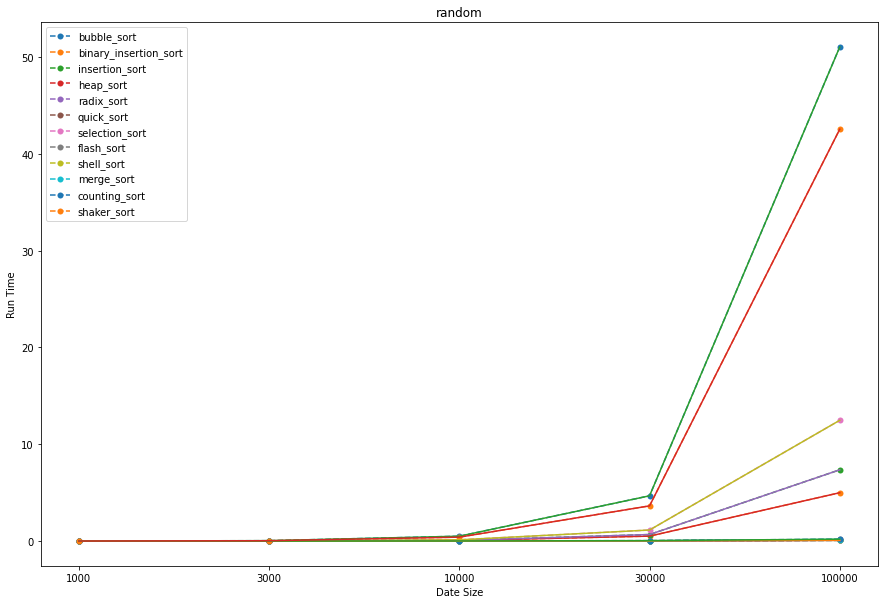

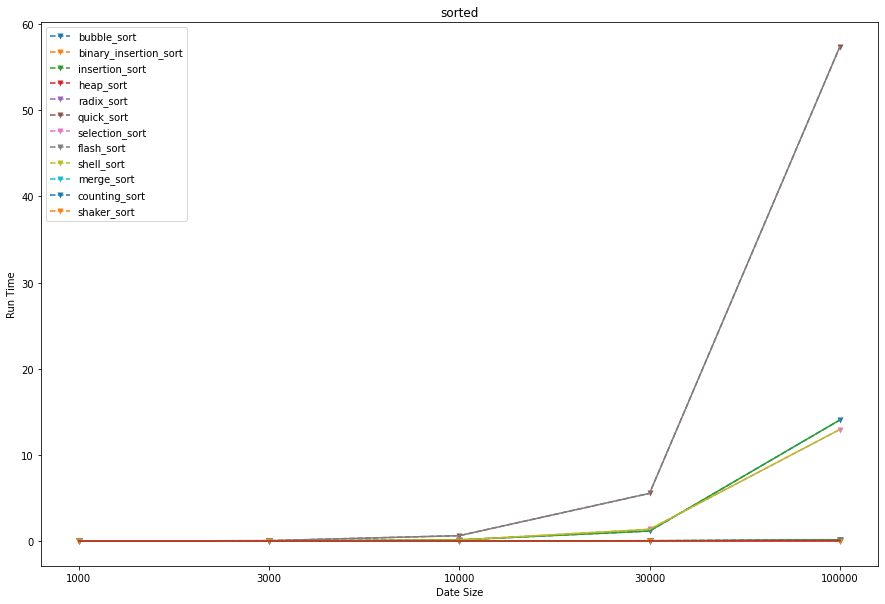

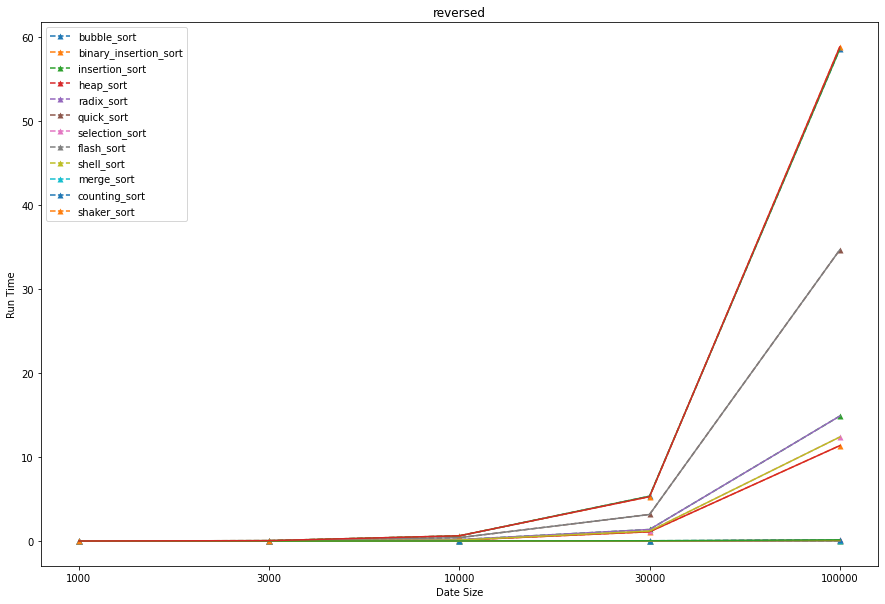

In [9]:
%matplotlib inline 

from cProfile import label


state = ['random','sorted','reversed']
marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))

for i in range(0,len(state)):

  plt.figure(figsize=(15, 10))
  data_copy = data[data['input_state'] == state[i]]
  x = data_copy['input_size']
  y = data_copy.drop(['input_state', 'input_size'],axis = 1)

  default_x_ticks = range(len(x))
  plt.plot(default_x_ticks,y,linestyle='--',markeredgecolor='none', marker=next(marker))
  # plt.plot(default_x_ticks,y,linestyle='--',markeredgecolor='none', marker='o')
  plt.plot(default_x_ticks,y)
  plt.xticks(default_x_ticks,x)

  plt.xlabel("Date Size")
  plt.ylabel("Run Time")
  plt.title(state[i])
  plt.legend(y.columns)
  
  print()
  plt.show()

<Figure size 432x288 with 0 Axes>

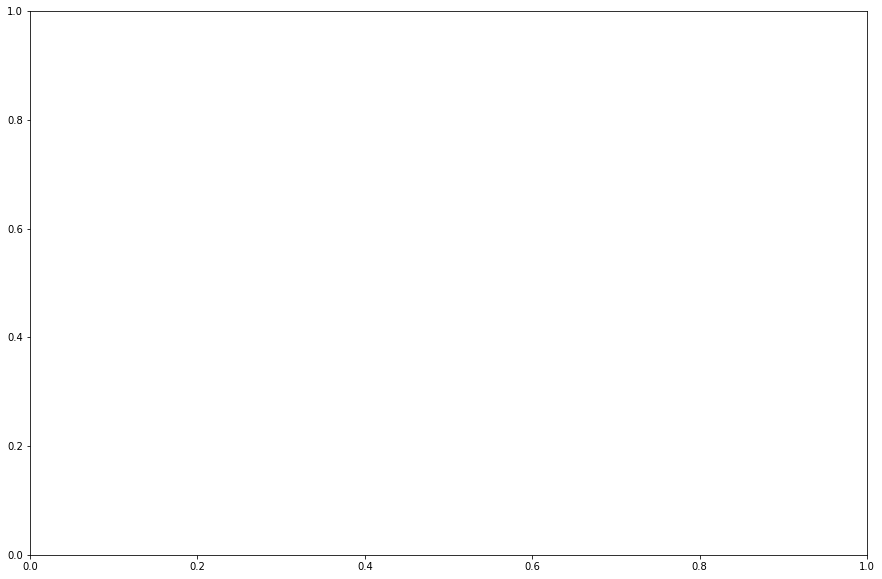

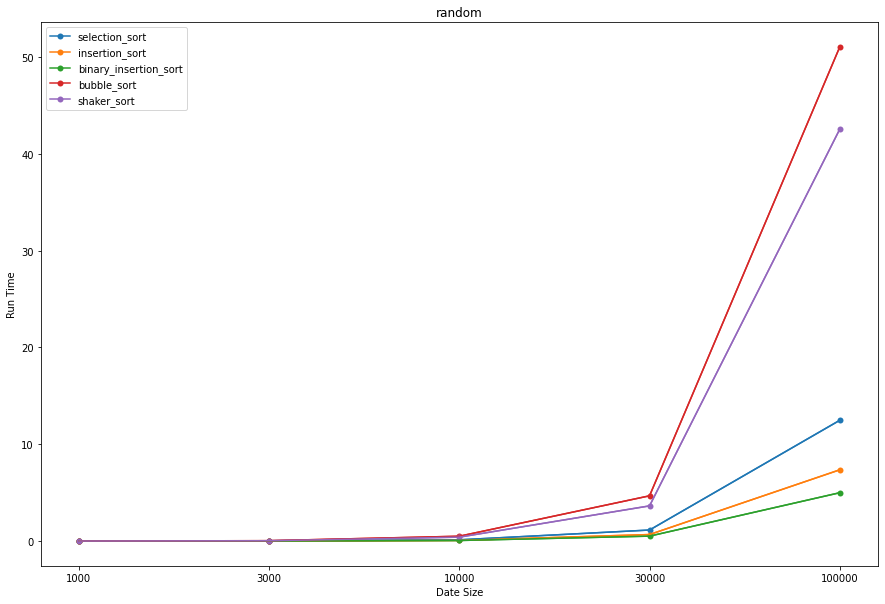

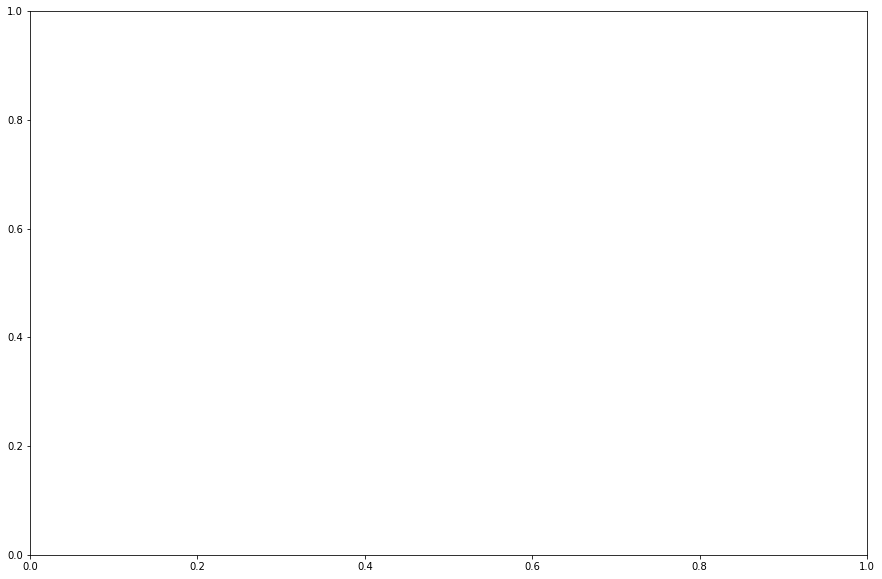

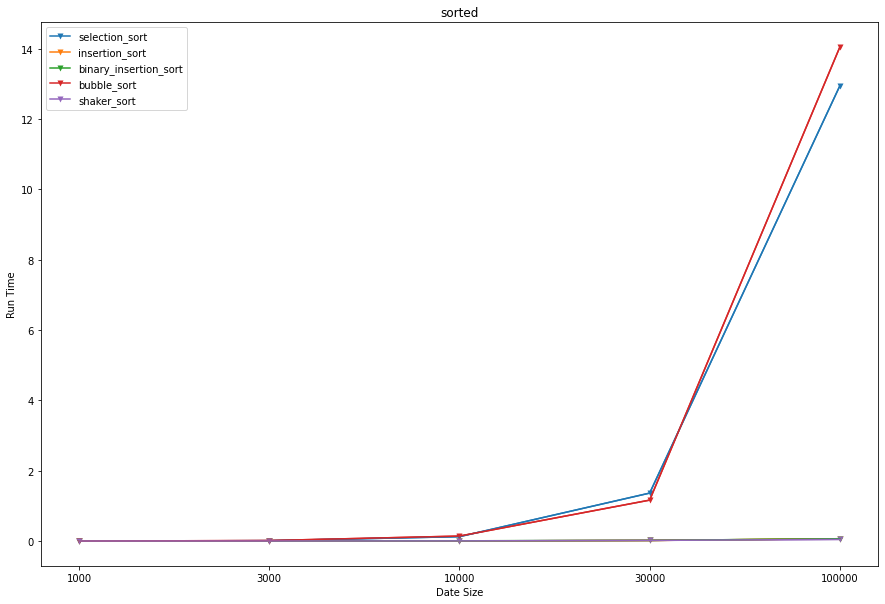

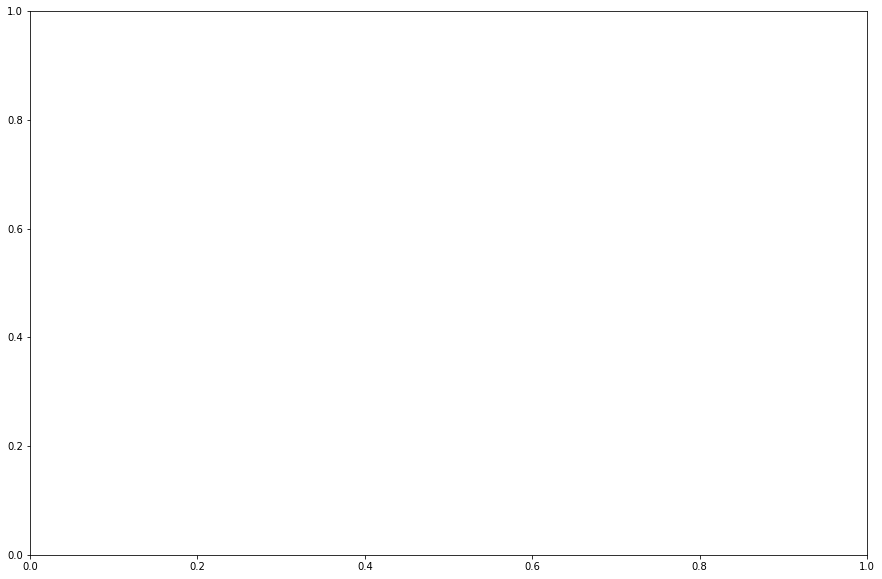

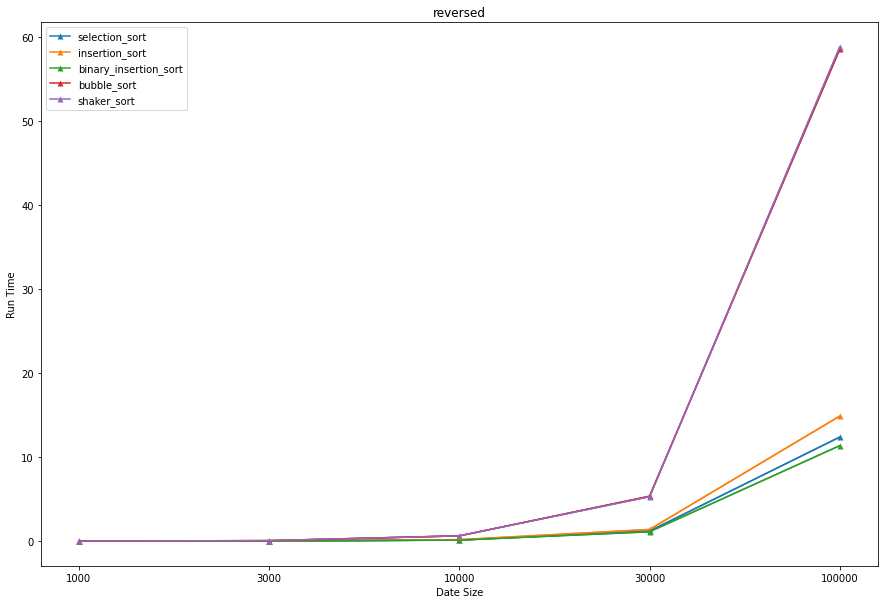

In [15]:
plt.clf()
# Complex = [['selection_sort', 'insertion_sort','bubble_sort', 'binary_insertion_sort', 'shaker_sort'],
Complex = [['selection_sort', 'insertion_sort', 'binary_insertion_sort', 'bubble_sort', 'shaker_sort']]
          #  ['shell_sort', 'heap_sort','merge_sort','quick_sort'],
          #  ['radix_sort','counting_sort','flash_sort']]
marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))
line_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
state = ['random','sorted','reversed']
for i in range(0,len(state)):
  plt.figure(figsize=(15, 10))
  plt.gca().set_prop_cycle(None)
  data_copy = data[data['input_state'] == state[i]]
  x = data_copy['input_size']
  # y = data_copy.drop(['Input State', 'Input Size'],axis = 1)
  color = line_colors[i]
  for j in range(len(Complex)):
    plt.figure(figsize=(15, 10))
    y = data_copy.drop(['input_state', 'input_size'],axis = 1)[Complex[j]]
    default_x_ticks = range(len(x))
    plt.plot(default_x_ticks,y, markeredgecolor='none', marker=next(marker))
    plt.gca().set_prop_cycle(None)
    plt.plot(default_x_ticks,y)
    plt.xticks(default_x_ticks,x)
    plt.xlabel("Date Size")
    plt.ylabel("Run Time")
    plt.title(state[i])
    plt.legend(y.columns)
    print()
    plt.show()